In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!tree

.
└── data_cleaning_and_extraction_CRC.ipynb

0 directories, 1 file


In [2]:
df_E = pd.read_csv('../raw_data/df_E_v1.csv', nrows = 1_000)

In [7]:
df_summary = pd.read_csv('../raw_data/summary_v1.csv')
df_E = df_summary[df_summary['Acorn'] == 'ACORN-E']
df_E.sort_values(by='start_date')

,Unnamed: 0,LCLid,start_date,end_date,number_of_days,data_points,missing_hh,zeros,tariff,Block,Acorn,Group,Classification
1052,1052,MAC000150,2011-11-23 10:00:00,2014-02-28 00:00:00,827,39719,6,0,Std,block_21,ACORN-E,Career Climbers,Rising Prosperity
1200,1200,MAC000152,2011-11-23 12:00:00,2014-02-28 00:00:00,827,39718,3,0,Std,block_24,ACORN-E,Career Climbers,Rising Prosperity
1201,1201,MAC000153,2011-11-23 12:00:00,2014-02-28 00:00:00,827,39713,8,0,Std,block_24,ACORN-E,Career Climbers,Rising Prosperity
1202,1202,MAC000159,2011-11-24 10:00:00,2014-02-28 00:00:00,826,39645,32,0,Std,block_24,ACORN-E,Career Climbers,Rising Prosperity
1203,1203,MAC000161,2011-11-24 10:30:00,2013-03-13 00:00:00,474,22777,3,0,Std,block_24,ACORN-E,Career Climbers,Rising Prosperity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,1156,MAC003934,2012-12-05 10:30:00,2014-02-28 00:00:00,449,21529,51,0,Std,block_23,ACORN-E,Career Climbers,Rising Prosperity
1106,1106,MAC003451,2012-12-08 00:30:00,2014-02-28 00:00:00,446,21455,1,0,Std,block_22,ACORN-E,Career Climbers,Rising Prosperity
1372,1372,MAC005037,2013-01-05 00:30:00,2014-02-28 00:00:00,418,20111,1,0,Std,block_27,ACORN-E,Career Climbers,Rising Prosperity
1722,1722,MAC001478,2013-03-09 00:30:00,2014-02-28 00:00:00,355,17087,1,0,Std,block_34,ACORN-E,Career Climbers,Rising Prosperity


In [10]:
df_E.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1567 entries, 610 to 2199
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1567 non-null   int64 
 1   LCLid           1567 non-null   object
 2   start_date      1567 non-null   object
 3   end_date        1567 non-null   object
 4   number_of_days  1567 non-null   int64 
 5   data_points     1567 non-null   int64 
 6   missing_hh      1567 non-null   int64 
 7   zeros           1567 non-null   int64 
 8   tariff          1567 non-null   object
 9   Block           1567 non-null   object
 10  Acorn           1567 non-null   object
 11  Group           1567 non-null   object
 12  Classification  1567 non-null   object
dtypes: int64(5), object(8)
memory usage: 171.4+ KB


In [3]:
df_full= pd.read_csv('../raw_data/CC_LCL-FullData-001.csv', nrows = 10_000_000)

In [4]:
df_full.keys()

Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) '], dtype='object')

In [5]:
df_full['DateTime'] = pd.to_datetime(df_full['DateTime'])

In [7]:
df_full.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00,0
1,MAC000002,Std,2012-10-12 01:00:00,0
2,MAC000002,Std,2012-10-12 01:30:00,0
3,MAC000002,Std,2012-10-12 02:00:00,0
4,MAC000002,Std,2012-10-12 02:30:00,0


In [47]:
datahouse3 = df_full[df_full['LCLid'] == 'MAC000003']
datahouse3

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
24158,MAC000003,Std,2012-02-20 13:00:00.0000000,0.976
24159,MAC000003,Std,2012-02-20 13:30:00.0000000,0.834
24160,MAC000003,Std,2012-02-20 14:00:00.0000000,0.577
24161,MAC000003,Std,2012-02-20 14:30:00.0000000,0.63
24162,MAC000003,Std,2012-02-20 15:00:00.0000000,0.679
...,...,...,...,...
59622,MAC000003,Std,2014-02-27 22:30:00.0000000,0.117
59623,MAC000003,Std,2014-02-27 23:00:00.0000000,0.064
59624,MAC000003,Std,2014-02-27 23:30:00.0000000,0.047
59625,MAC000003,Std,2014-02-28 00:00:00.0000000,0.07


In [55]:
datahouse3 = datahouse3.iloc[49:96]

In [50]:
datahouse3 = datahouse3.reset_index().drop(columns = 'index').reset_index()

In [51]:
datahouse3['KWH/hh (per half hour) '] = pd.to_numeric(datahouse3['KWH/hh (per half hour) '])

ValueError: Unable to parse string "Null" at position 14552

In [37]:
datahouse3['DateTime'] = pd.to_datetime(datahouse3['DateTime'], )

In [43]:
datahouse3['DateTime'] = pd.to_datetime(datahouse3['DateTime'],format= '%H:%M' )

ValueError: unconverted data remains: :00

In [52]:
datahouse3['DateTime']

0        2012-02-20 13:00:00.0000000
1        2012-02-20 13:30:00.0000000
2        2012-02-20 14:00:00.0000000
3        2012-02-20 14:30:00.0000000
4        2012-02-20 15:00:00.0000000
                    ...             
35464    2014-02-27 22:30:00.0000000
35465    2014-02-27 23:00:00.0000000
35466    2014-02-27 23:30:00.0000000
35467    2014-02-28 00:00:00.0000000
35468    2014-02-28 00:00:00.0000000
Name: DateTime, Length: 35469, dtype: object

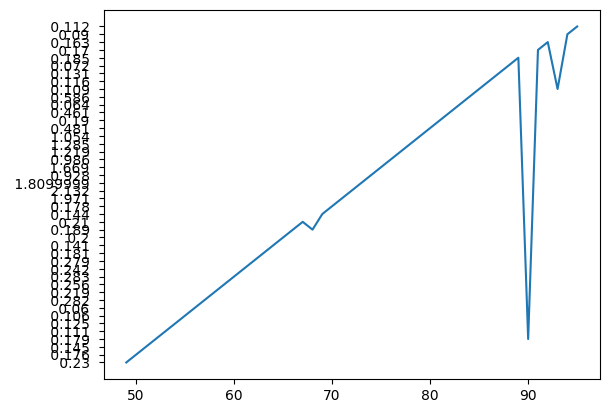

In [56]:
plt.plot(datahouse3['index'], datahouse3['KWH/hh (per half hour) '])

<AxesSubplot:xlabel='DateTime', ylabel='KWH/hh (per half hour) '>

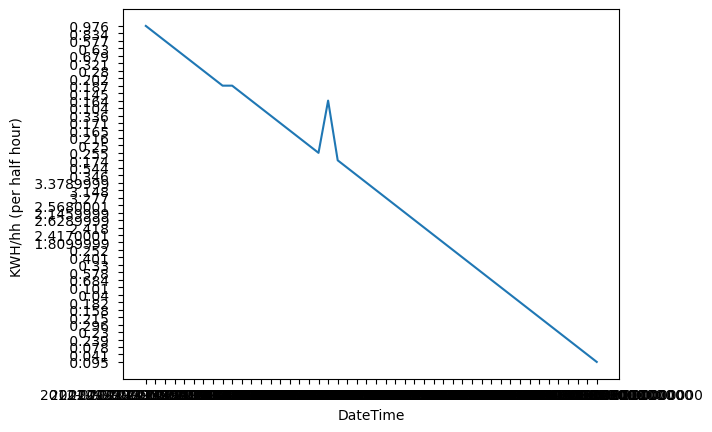

In [10]:
sns.lineplot(data = datahouse3, x = 'DateTime', y = 'KWH/hh (per half hour) ')

In [13]:
plt.plot(datahouse3.index(), datahouse3['KWH/hh (per half hour) '])

TypeError: 'Int64Index' object is not callable

In [20]:
df_full2= pd.read_csv('../raw_data/CC_LCL-FullData-001.csv', nrows = 10_000_000, skiprows=10_000_000)

In [45]:
df_full.iloc[24158]

LCLid                                        MAC000003
stdorToU                                           Std
DateTime                   2012-02-20 13:00:00.0000000
KWH/hh (per half hour)                          0.976 
Name: 24158, dtype: object